In [1]:
import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np
import matplotlib.pyplot as plt
A_to_au_conversion = 1.8897259885789

In [2]:
r = 0.742
symbols = ["H", "H"]
geometry = np.array([0.0, 0.0, 0.0, 0.0, 0.0, r*A_to_au_conversion])
H, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry)
print("Number of qubits = ", qubits)
print("The Hamiltonian is ", H)

Number of qubits =  4
The Hamiltonian is    (-0.2225098666481647) [Z3]
+ (-0.22250986664816463) [Z2]
+ (-0.09963186538176191) [I0]
+ (0.17110569283214036) [Z0]
+ (0.17110569283214036) [Z1]
+ (0.12051037033744402) [Z0 Z2]
+ (0.12051037033744402) [Z1 Z3]
+ (0.16584097082970475) [Z0 Z3]
+ (0.16584097082970475) [Z1 Z2]
+ (0.16859357109492182) [Z0 Z1]
+ (0.17432084502934375) [Z2 Z3]
+ (-0.04533060049226072) [Y0 Y1 X2 X3]
+ (-0.04533060049226072) [X0 X1 Y2 Y3]
+ (0.04533060049226072) [Y0 X1 X2 Y3]
+ (0.04533060049226072) [X0 Y1 Y2 X3]


In [3]:
qubits = 4
dev = qml.device('default.qubit', wires=qubits)

def circuit(params, wires=qubits):
    for i in wires:
        qml.Rot(*params[i], wires=i)
    qml.CNOT(wires=[2,3])
    qml.CNOT(wires=[2,0])
    qml.CNOT(wires=[3,1])

cost_fn = qml.ExpvalCost(circuit, H, dev)

opt = qml.AdamOptimizer(stepsize=0.01)
np.random.seed(0)
params = np.random.normal(0, np.pi, (qubits, 3))

/home/azhar04/anaconda3/envs/quantum-dev-2/lib/python3.11/site-packages/pennylane/vqe/vqe.py:155: PennyLaneDeprecationWarning: ExpvalCost is deprecated, use qml.expval() instead. For optimizing Hamiltonian measurements with measuring commuting terms in parallel, use the grouping_type keyword in qml.Hamiltonian.
  warnings.warn(


In [4]:
max_iterations = 1000
conv_tol = 1e-08

energy_list = []

prev_energy = cost_fn(params)
energy_list += [prev_energy]

for n in range(max_iterations):
    params = opt.step(cost_fn, params)
    energy = cost_fn(params)
    conv = np.abs(energy - prev_energy)

    if (n+1) % 20 == 0:
        print('Iteration = {:},  Energy = {:.8f} Ha'.format(n+1, energy))

    if conv <= conv_tol:
        break

    prev_energy = energy
    energy_list += [prev_energy]

print()
print('Final convergence parameter = {:.8f} Ha'.format(conv))
print('Final value of the ground-state energy = {:.8f} Ha'.format(energy))
print('Accuracy with respect to the FCI energy: {:.8f} Ha ({:.8f} kcal/mol)'.format(
    np.abs(energy - (-1.136189454088)), np.abs(energy - (-1.136189454088))*627.503
    )
)
print()
print('Final circuit parameters = \n', params)

Iteration = 20,  Energy = 0.02510284 Ha
Iteration = 40,  Energy = -0.16003698 Ha
Iteration = 60,  Energy = -0.30851181 Ha
Iteration = 80,  Energy = -0.42436239 Ha
Iteration = 100,  Energy = -0.53291991 Ha
Iteration = 120,  Energy = -0.65868591 Ha
Iteration = 140,  Energy = -0.79405900 Ha
Iteration = 160,  Energy = -0.91262332 Ha
Iteration = 180,  Energy = -0.99878241 Ha
Iteration = 200,  Energy = -1.05451901 Ha
Iteration = 220,  Energy = -1.08933194 Ha
Iteration = 240,  Energy = -1.11090913 Ha
Iteration = 260,  Energy = -1.12376890 Ha
Iteration = 280,  Energy = -1.13092215 Ha
Iteration = 300,  Energy = -1.13457533 Ha
Iteration = 320,  Energy = -1.13625763 Ha
Iteration = 340,  Energy = -1.13694048 Ha
Iteration = 360,  Energy = -1.13717787 Ha
Iteration = 380,  Energy = -1.13724579 Ha
Iteration = 400,  Energy = -1.13726084 Ha
Iteration = 420,  Energy = -1.13726315 Ha

Final convergence parameter = 0.00000001 Ha
Final value of the ground-state energy = -1.13726330 Ha
Accuracy with respect 

In [5]:
energy_list

[tensor(0.22508285, requires_grad=True),
 tensor(0.21521024, requires_grad=True),
 tensor(0.20530303, requires_grad=True),
 tensor(0.19536443, requires_grad=True),
 tensor(0.18539772, requires_grad=True),
 tensor(0.17540629, requires_grad=True),
 tensor(0.1653936, requires_grad=True),
 tensor(0.15536319, requires_grad=True),
 tensor(0.14531869, requires_grad=True),
 tensor(0.13526381, requires_grad=True),
 tensor(0.12520234, requires_grad=True),
 tensor(0.11513814, requires_grad=True),
 tensor(0.10507514, requires_grad=True),
 tensor(0.09501734, requires_grad=True),
 tensor(0.08496878, requires_grad=True),
 tensor(0.07493356, requires_grad=True),
 tensor(0.06491581, requires_grad=True),
 tensor(0.05491968, requires_grad=True),
 tensor(0.04494936, requires_grad=True),
 tensor(0.03500902, requires_grad=True),
 tensor(0.02510284, requires_grad=True),
 tensor(0.01523496, requires_grad=True),
 tensor(0.0054095, requires_grad=True),
 tensor(-0.00436947, requires_grad=True),
 tensor(-0.014097

### Circuit

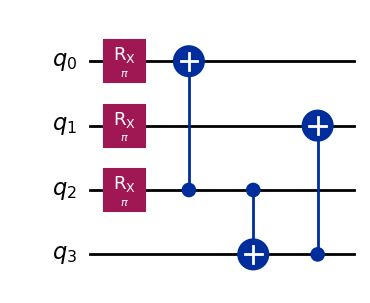

In [6]:
from qiskit import QuantumCircuit
import numpy as np

circuit = QuantumCircuit(4, name='circuit')

circuit.rx(np.pi, 0)
circuit.rx(np.pi, 1)
circuit.rx(np.pi, 2)

circuit.cx(2,0)
circuit.cx(2,3)
circuit.cx(3,1)

circuit.draw("mpl")

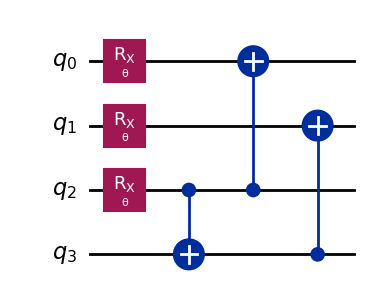

In [7]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_circuit_layout
import numpy as np

# Define the parameter theta
theta = Parameter('θ')

# Create a 4-qubit Quantum Circuit
circuit = QuantumCircuit(4, name='circuit')

# Apply parameterized RX gate to qubits 0, 1, and 2
circuit.rx(theta, 0)
circuit.rx(theta, 1)
circuit.rx(theta, 2)

# Apply CX gates
circuit.cx(2,3)
circuit.cx(2,0)
circuit.cx(3,1)

# Draw the circuit
circuit.draw("mpl")


### FCI

In [8]:
from pyscf import gto, scf, ao2mo, fci

In [9]:
def FCI(L, e_list):
  mol = gto.M(atom='H 0 0 ' + str(L) + '; H 0 0 0', basis='sto-3g')
  mf = scf.RHF(mol).run()
  h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
  eri = ao2mo.kernel(mol, mf.mo_coeff)
  cisolver = fci.direct_spin1.FCI(mol)
  e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc())
  e_list += [e]
  return e_list

In [10]:
FCI(0.742, [])

converged SCF energy = -1.11665124741152


[-1.1372633383635353]

In [11]:
max_iterations = 1000
conv_tol = 1e-08

energy_list = []

prev_energy = cost_fn(params)
energy_list += [prev_energy]

for n in range(max_iterations):
    params = opt.step(cost_fn, params)
    energy = cost_fn(params)
    conv = np.abs(energy - prev_energy)

    if (n+1) % 20 == 0:
        print('Iteration = {:},  Energy = {:.8f} Ha'.format(n+1, energy))

    if conv <= conv_tol:
        break

    prev_energy = energy
    energy_list += [prev_energy]

print()
print('Final convergence parameter = {:.8f} Ha'.format(conv))
print('Final value of the ground-state energy = {:.8f} Ha'.format(energy))
print('Accuracy with respect to the FCI energy: {:.8f} Ha ({:.8f} kcal/mol)'.format(
    np.abs(energy - (-1.136189454088)), np.abs(energy - (-1.136189454088))*627.503
    )
)
print()
print('Final circuit parameters = \n', params)


Final convergence parameter = 0.00000001 Ha
Final value of the ground-state energy = -1.13726331 Ha
Accuracy with respect to the FCI energy: 0.00107385 Ha (0.67384616 kcal/mol)

Final circuit parameters = 
 [[ 5.54193389e+00  3.14138507e+00  3.07479606e+00]
 [ 7.03997361e+00  3.14199988e+00 -3.07020901e+00]
 [ 2.98479079e+00 -2.26381126e-01  8.10654145e-11]
 [ 1.28993324e+00  1.38276289e-07  4.56873497e+00]]


Text(0.5, 0, 'Iterasi')

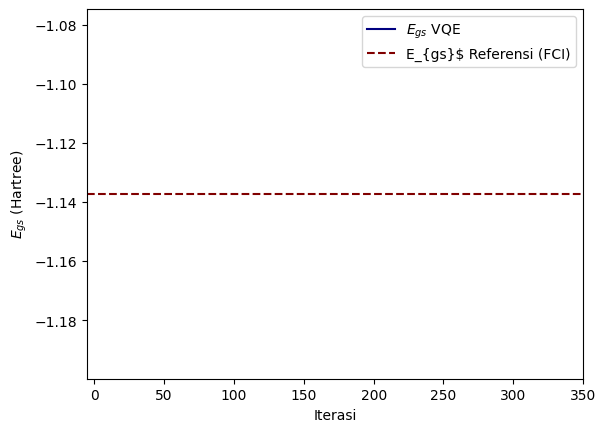

In [12]:
# plt.plot(energy_list[::5], label="$E_{gs}$ VQE", linestyle="", marker='o', markersize=0.5, color='navy')

array_length = len(energy_list)
iterate = np.arange(1, array_length + 1)

# plt.scatter(iterate[::5], energy_list[::5], label="$E_{gs}$ VQE", linestyle="", marker='o', color='navy', s=10)
plt.plot(energy_list, label="$E_{gs}$ VQE", color='navy')
plt.ylabel("$E_{gs}$ (Hartree)")
plt.axhline(y=-1.1372633383635353, linestyle='--', color='maroon', label='E_{gs}$ Referensi (FCI)')
plt.legend()
plt.xlim(-5,350)
plt.xlabel("Iterasi")

In [13]:
e_fci = []

bond_length_fci = np.linspace(0.1, 3.0, 30)

for i in range(len(bond_length_fci)):
  e_fci = FCI(bond_length_fci[i], e_fci)

converged SCF energy = 2.71588739329275


converged SCF energy = 0.164175012061695
converged SCF energy = -0.593827758535727
converged SCF energy = -0.90436139416354
converged SCF energy = -1.04299627454009
converged SCF energy = -1.1011282422677
converged SCF energy = -1.11734903499028
converged SCF energy = -1.1108503974766
converged SCF energy = -1.09191404102006
converged SCF energy = -1.06610864931794
converged SCF energy = -1.03653887502918
converged SCF energy = -1.00510670656849
converged SCF energy = -0.973110615777579
converged SCF energy = -0.941480654707799
converged SCF energy = -0.910873554594387
converged SCF energy = -0.881732449946057
converged SCF energy = -0.854337626951293
converged SCF energy = -0.828848147926977
converged SCF energy = -0.805332844893277
converged SCF energy = -0.783792654277353
converged SCF energy = -0.764177651616797
converged SCF energy = -0.746401349991159
converged SCF energy = -0.730353321354887
converged SCF energy = -0.715910060453807
converged SCF energy = -0.702943599723527
conv

In [14]:
def change_geometry(L_new, L_prev):
  #read input file
  fin = open("./h2.xyz", "rt")
  #read file contents to string
  data = fin.read()
  #replace all occurrences of the required string
  data = data.replace(str(L_prev), str(L_new))
  #close the input file
  fin.close()
  #open the input file in write mode
  fin = open("./h2.xyz", "wt")
  #overrite the input file with the resulting data
  fin.write(data)
  #close the file
  fin.close()
  return L_new

In [15]:
max_iterations = 1000
conv_tol = 1e-08

qubits = 4

def jordan_wigner_map():
  geometry = './h2.xyz'
  charge = 0
  multiplicity = 1
  basis_set = 'sto-3g'
  name = 'h2'

  h, qubits = qchem.molecular_hamiltonian(
      name,
      geometry,
      charge=charge,
      mult=multiplicity,
      basis=basis_set,
      active_electrons=2,
      active_orbitals=2,
      mapping='jordan_wigner'
  )

  #print('Number of qubits = ', qubits)
  #print('Hamiltonian is ', h)

  return h


energy_list = []
bond_length_vqe = np.linspace(0.1, 3.0, 30)

L_before = 0.80

for k in range(len(bond_length_vqe)):

  L = bond_length_vqe[k]

  L_before = change_geometry(L, L_before)

  dev = qml.device('default.qubit', wires=qubits)

  def circuit(params, wires):
      #qml.BasisState(np.array([1, 1, 0, 0]), wires=wires)
      for i in wires:
          qml.Rot(*params[i], wires=i)
      qml.CNOT(wires=[2, 3])
      qml.CNOT(wires=[2, 0])
      qml.CNOT(wires=[3, 1])

  h = jordan_wigner_map()

  cost_fn = qml.ExpvalCost(circuit, h, dev)

  opt = qml.AdamOptimizer(stepsize=0.01)
  np.random.seed(0)
  params = np.random.normal(0, np.pi, (qubits, 3))

  prev_energy = cost_fn(params)

  for n in range(max_iterations):
      params = opt.step(cost_fn, params)
      energy = cost_fn(params)
      conv = np.abs(energy - prev_energy)

      if conv <= conv_tol:
          break

      prev_energy = energy

  energy_list += [energy]
  print()
  print('Bond Length = {:.4f} Angstrom'.format(L))
  print('Final convergence parameter = {:.8f} Ha'.format(conv))
  print('Final value of the ground-state energy = {:.8f} Ha'.format(energy))
  print()

UnboundLocalError: cannot access local variable 'geometry_dhf' where it is not associated with a value